# test

In [1]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

fs = (14, 8)

In [2]:
with open("data/data.pkl", "rb") as f:
    df = pickle.load(f)

In [3]:
idx1 = df[df.bathrooms == 0].index

In [4]:
idx2 = df[df.bedrooms == 0].index

In [5]:
df = df.drop(idx1, errors="ignore")
df = df.drop(idx2, errors="ignore")

In [6]:
len(df)

21597

In [7]:
df.columns

Index(['bathrooms', 'bedrooms', 'condition', 'date', 'date_ord', 'floors',
       'grade', 'lat', 'long', 'sqft_above', 'sqft_basement', 'sqft_living',
       'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'waterfront',
       'yr_built', 'yr_renovated', 'zipcode', 'price'],
      dtype='object')

In [8]:
x = df.drop("price", axis=1)
y = df.price

In [9]:
x["has_basement"] = x.sqft_basement.apply(lambda x: 0 if x == 0 else 1)
x["has_renovation"] = x.yr_renovated.apply(lambda x: 0 if x == 0 else 1)

In [10]:
formula = "np.log(price) ~ scale(np.log(bathrooms)) + scale(np.log(bedrooms)) + \
scale(np.log(sqft_living)) + scale(np.log(sqft_lot)) + C(view) + C(condition) + \
C(grade) + C(zipcode) + 0"

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [12]:
model = sm.OLS.from_formula(formula, data=pd.concat([x_train, y_train], axis=1))
result = model.fit()

In [13]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1162.
Date:                Wed, 03 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:47:10   Log-Likelihood:                 4004.2
No. Observations:               15117   AIC:                            -7824.
Df Residuals:                   15025   BIC:                            -7123.
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
C(view)[0]          

In [14]:
y_predict = result.predict(x_test)

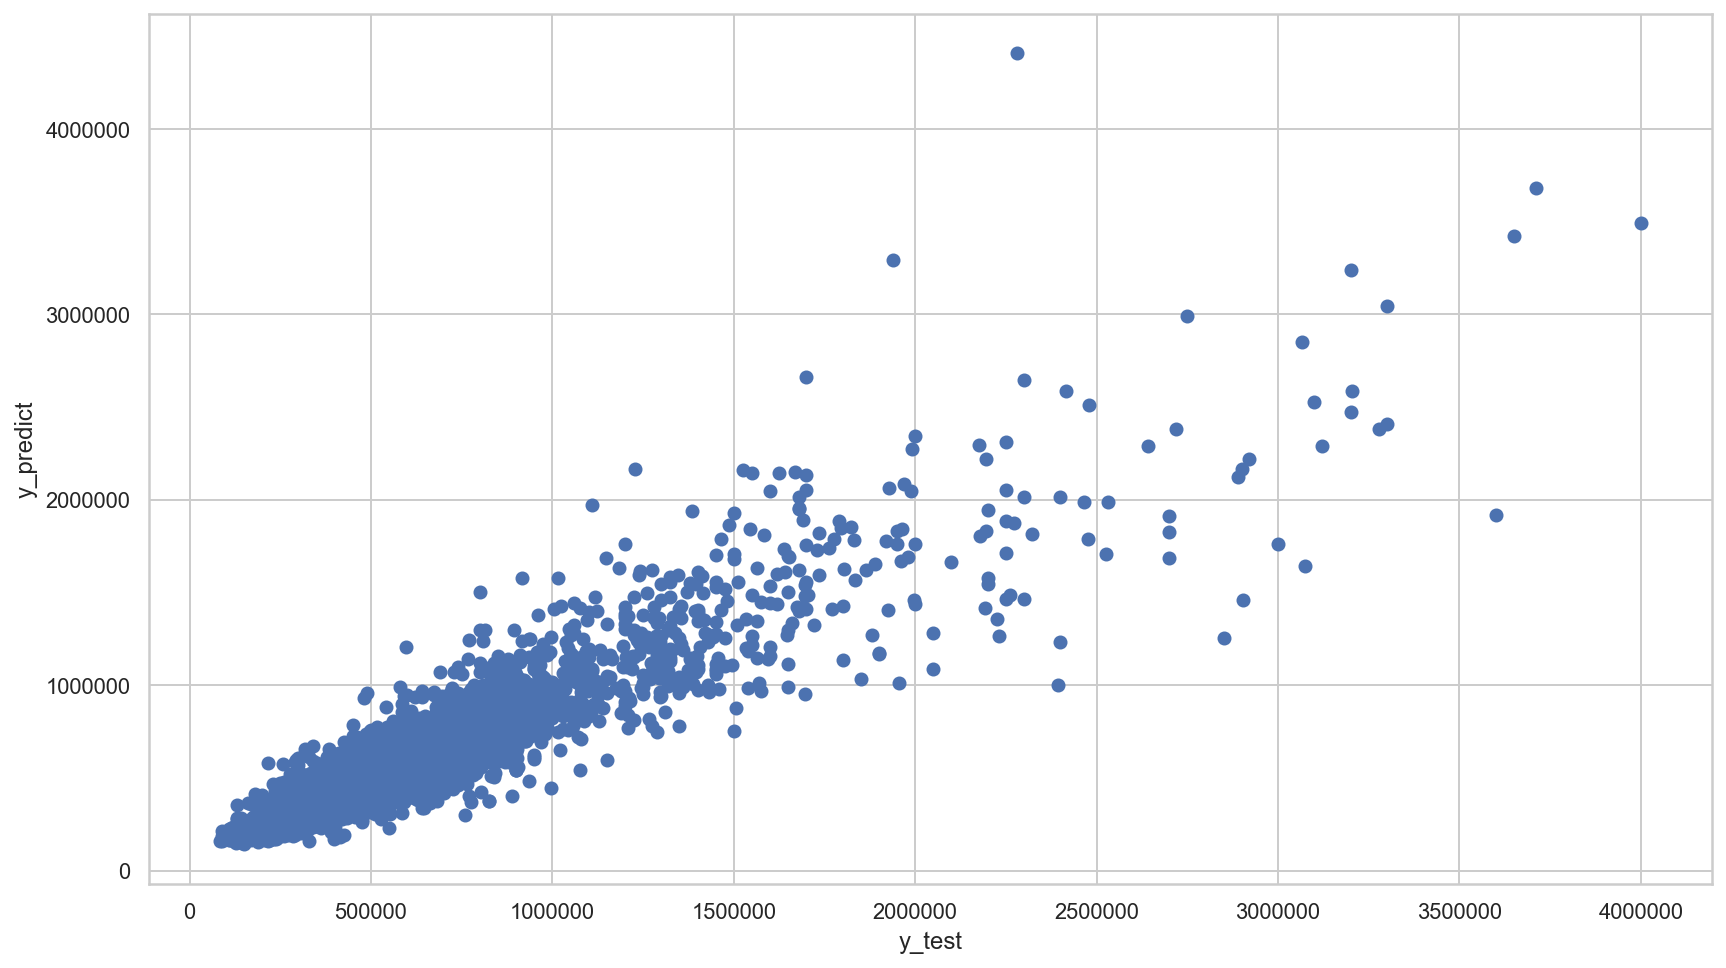

In [15]:
plt.figure(figsize=fs)
plt.xlabel("y_test")
plt.ylabel("y_predict")
plt.scatter(y_test, y_predict.apply(np.exp))
plt.show()

In [17]:
r2_score(y_test, y_predict.apply(np.exp))

0.857580595537325

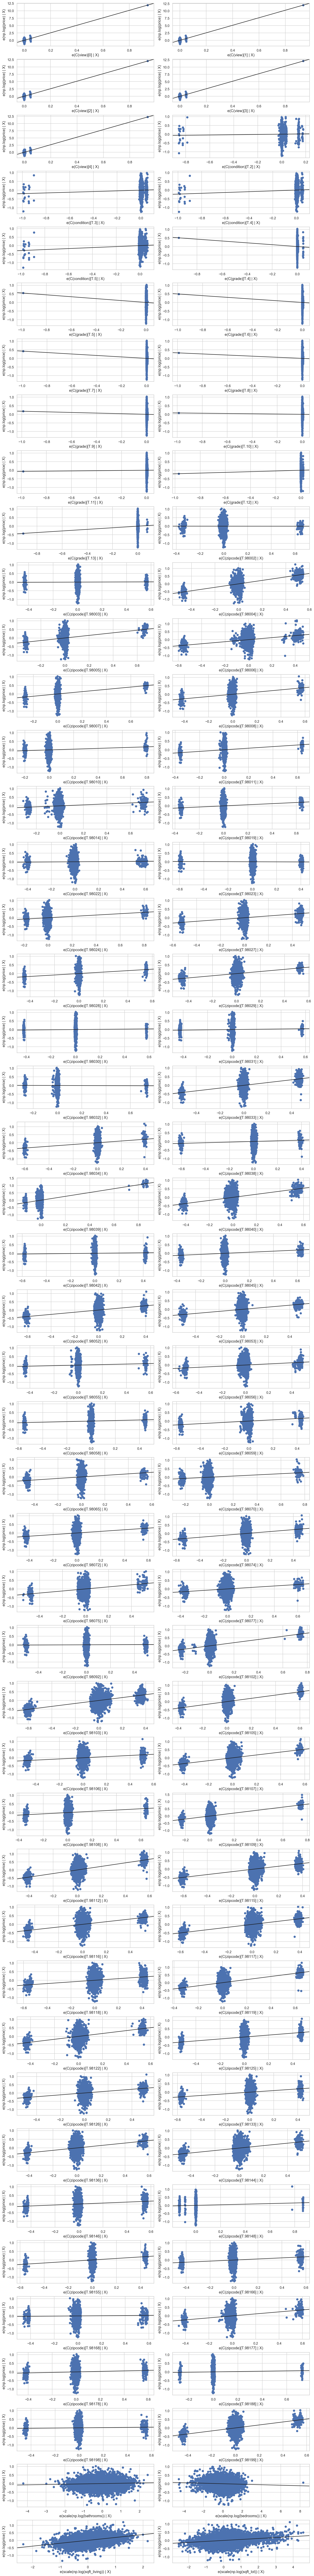

In [18]:
fig = plt.figure(figsize=(14, 120))
sm.graphics.plot_partregress_grid(result, fig=fig)
fig.suptitle("")
plt.show()

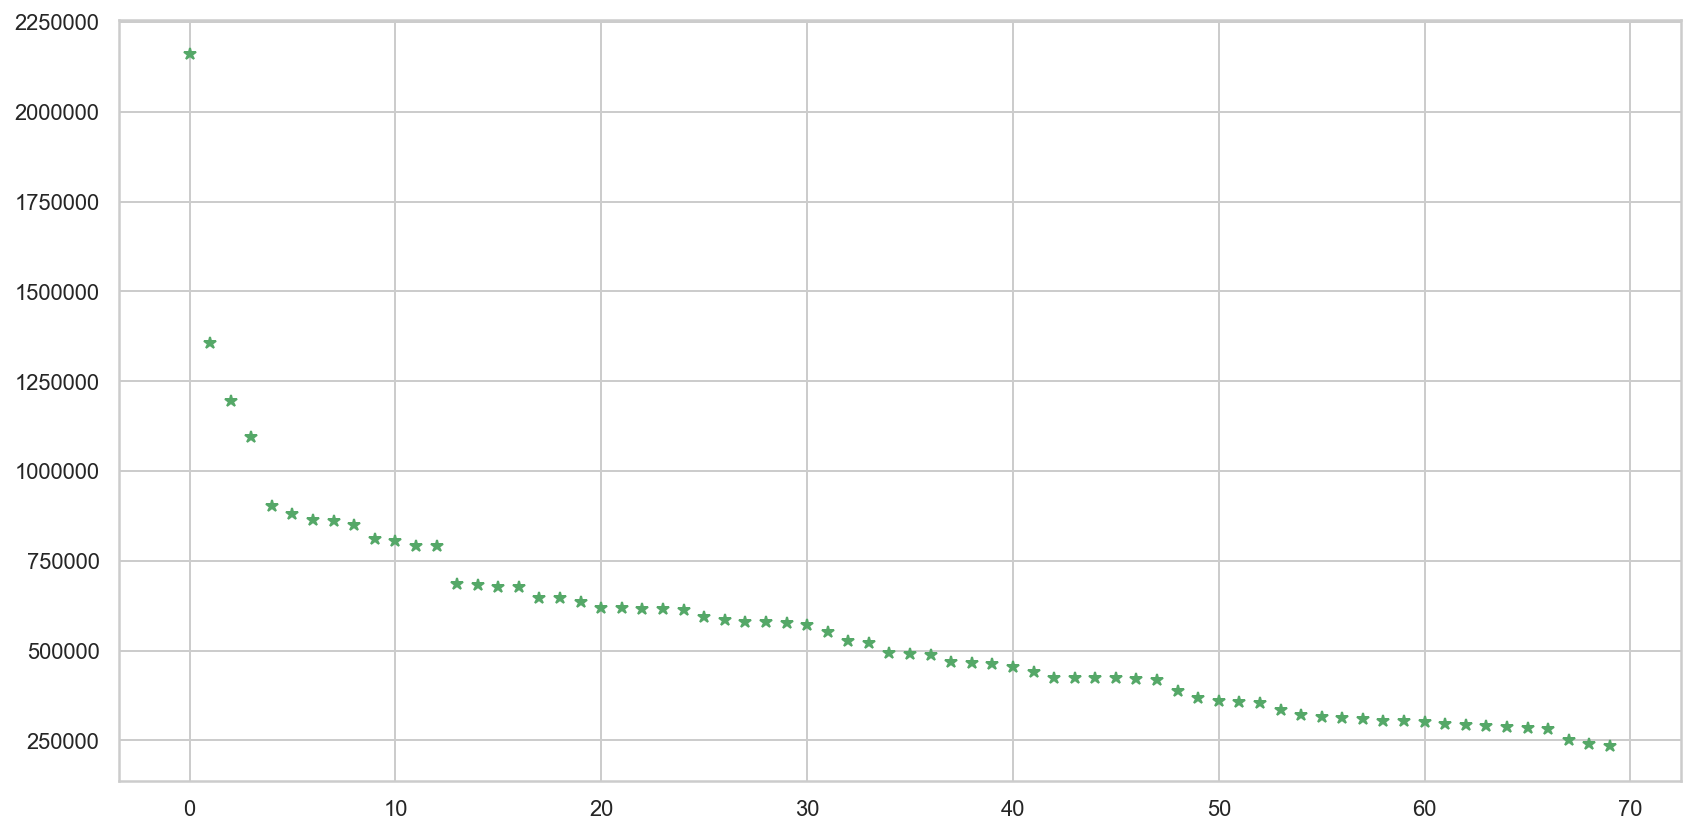

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(temp.index, temp.price, "g*")
plt.show()